In [22]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [26]:
data = pd.read_csv('data/USArrests.csv', index_col=0)
X = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns)
X.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [28]:
pca = PCA()
pc_names = ['PC{}'.format(x) for x in range(1, len(X.columns)+1)]
pc = pca.fit_transform(X)
pc = pd.DataFrame(pc, columns=pc_names)
loadings = pca.components_.T
loadings = pd.DataFrame(loadings, columns=pc_names, index=X.columns)
loadings

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


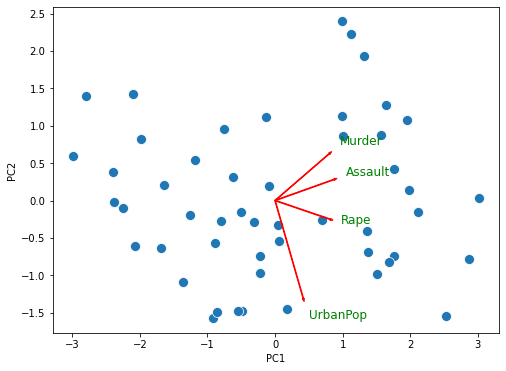

In [75]:
plt.figure(figsize=(8,6))
sb.scatterplot(data=pc, x='PC1', y='PC2', s=100)
for i in range(len(X.columns)):
    plt.arrow(0,0,loadings['PC1'][i]*1.5, loadings['PC2'][i]*1.5, shape='full', width=0.01, color='red')
    plt.text(loadings['PC1'][i]*1.5*1.2, loadings['PC2'][i]*1.5*1.2, loadings.index[i], size=12, color='green')

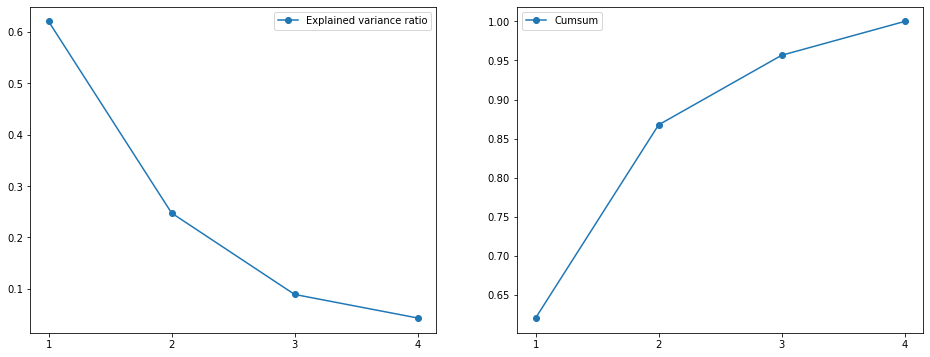

In [82]:
plt.figure(figsize=(16,6))
range = np.arange(1,len(X.columns)+1)
plt.subplot(1,2,1)
plt.plot(range, pca.explained_variance_ratio_, '-', marker='o', label='Explained variance ratio')
plt.xticks(range)
plt.legend()

plt.subplot(1,2,2)
plt.plot(range, pca.explained_variance_ratio_.cumsum(), '-', marker='o', label='Cumsum')
plt.xticks(range)
plt.legend()
plt.show()